# Create Train, Test and Val Dataset

Extract rows that have a combined length smaller than MAX_LENGTH

In [8]:
import os
import pandas as pd
import numpy as np
from functions.fine_tune_model import calculate_lengths, filter_rows_by_length
import matplotlib.pyplot as plt

## Token Analysis for initial Subsample

In [9]:
# Load the tokenizer and model
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("prajjwal1/bert-tiny")

In [10]:
train_data = pd.read_csv("cnndm/init_train_data_base.csv", sep=';')
valid_data = pd.read_csv("cnndm/init_valid_data_base.csv", sep=';')
test_data = pd.read_csv("cnndm/init_test_data_base.csv", sep=';')

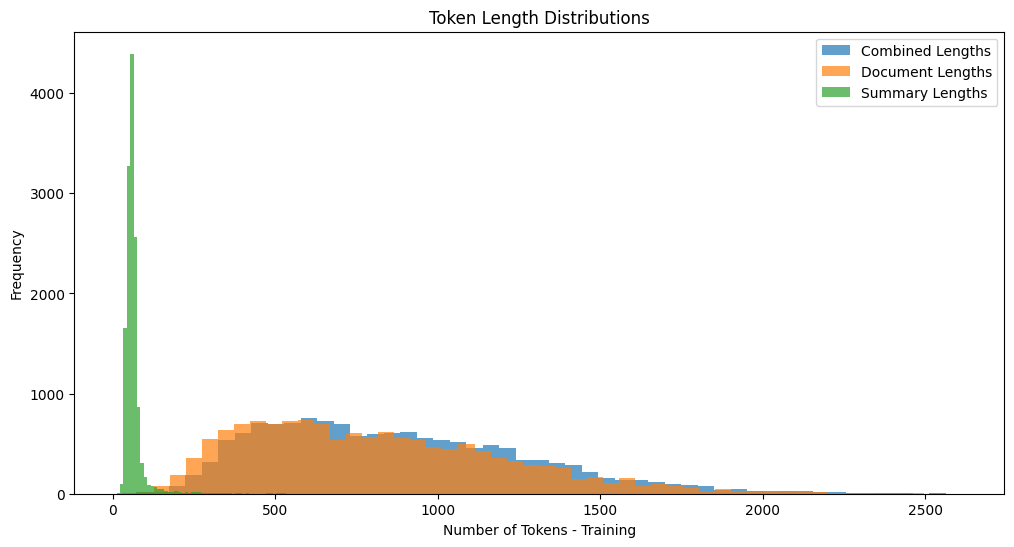

       Document Lengths  Summary Lengths  Combined Lengths
count      13990.000000     13990.000000      13990.000000
mean         805.208149        64.816154        873.024303
std          400.735050        39.597988        407.586607
min           27.000000        12.000000         70.000000
25%          486.000000        49.000000        551.000000
50%          745.000000        58.000000        814.000000
75%         1068.750000        68.000000       1139.000000
max         2496.000000       534.000000       2614.000000


In [11]:
# Calculate token lengths for documents and summaries
doc_lengths = calculate_lengths(train_data, tokenizer, column_name='article')
summ_lengths = calculate_lengths(train_data, tokenizer, column_name='highlights')

# Combine lengths for total sequence lengths
combined_lengths = [d + s + 3 for d, s in zip(doc_lengths, summ_lengths)]  # +3 for [CLS], [SEP], [SEP]

# Create a DataFrame for analysis
lengths_df = pd.DataFrame({
    'Document Lengths': doc_lengths,
    'Summary Lengths': summ_lengths,
    'Combined Lengths': combined_lengths
})

# Plot distributions
plt.figure(figsize=(12, 6))
plt.hist(lengths_df['Combined Lengths'], bins=50, alpha=0.7, label='Combined Lengths')
plt.hist(lengths_df['Document Lengths'], bins=50, alpha=0.7, label='Document Lengths')
plt.hist(lengths_df['Summary Lengths'], bins=50, alpha=0.7, label='Summary Lengths')
#plt.axvline(x=512, color='red', linestyle='--', label='Max Length (512)')
plt.xlabel('Number of Tokens - Training')
plt.ylabel('Frequency')
plt.legend()
plt.title('Token Length Distributions')
plt.show()

# Print statistics
print(lengths_df.describe())


In [12]:
# Calculate token lengths for documents and summaries
doc_lengths_test = calculate_lengths(test_data, tokenizer, column_name='article')
summ_lengths_test = calculate_lengths(test_data, tokenizer, column_name='highlights')

# Combine lengths for total sequence lengths
combined_lengths_test = [d + s + 3 for d, s in zip(doc_lengths_test, summ_lengths_test)]  # +3 for [CLS], [SEP], [SEP]

# Create a DataFrame for analysis
lengths_df_test = pd.DataFrame({
    'Document Lengths': doc_lengths_test,
    'Summary Lengths': summ_lengths_test,
    'Combined Lengths': combined_lengths_test
})

print(lengths_df_test.describe())

       Document Lengths  Summary Lengths  Combined Lengths
count       1988.000000      1988.000000       1988.000000
mean         805.077465        55.414487        863.491952
std          448.426352        43.009652        458.541151
min          104.000000        14.000000        127.000000
25%          440.000000        36.000000        494.000000
50%          728.500000        46.000000        787.500000
75%         1090.000000        58.000000       1162.500000
max         2965.000000       521.000000       3046.000000


In [13]:
# Calculate token lengths for documents and summaries
doc_lengths_valid = calculate_lengths(valid_data, tokenizer, column_name='article')
summ_lengths_valid = calculate_lengths(valid_data, tokenizer, column_name='highlights')

# Combine lengths for total sequence lengths
combined_lengths_valid = [d + s + 3 for d, s in zip(doc_lengths_valid, summ_lengths_valid)]  # +3 for [CLS], [SEP], [SEP]

# Create a DataFrame for analysis
lengths_df_valid = pd.DataFrame({
    'Document Lengths': doc_lengths_valid,
    'Summary Lengths': summ_lengths_valid,
    'Combined Lengths': combined_lengths_valid
})  

print(lengths_df_valid.describe())

       Document Lengths  Summary Lengths  Combined Lengths
count       1996.000000      1996.000000       1996.000000
mean         827.286573        57.431363        887.717936
std          444.573307        54.391137        454.328109
min          114.000000        12.000000        133.000000
25%          473.000000        35.000000        523.000000
50%          756.500000        46.000000        821.000000
75%         1107.000000        59.000000       1175.000000
max         2287.000000       543.000000       2541.000000


## Create Datasets

In [2]:
train_raw = pd.read_csv("cnndm/train_raw.csv", sep = ";")
test_raw = pd.read_csv("cnndm/test_raw.csv", sep = ";")
val_raw = pd.read_csv("cnndm/valid_raw.csv", sep = ";")

In [4]:
MAX_LENGTH = 512

filtered_train = filter_rows_by_length(train_raw, tokenizer, max_length=MAX_LENGTH)
filtered_test = filter_rows_by_length(test_raw, tokenizer, max_length=MAX_LENGTH)
filtered_val = filter_rows_by_length(val_raw, tokenizer, max_length=MAX_LENGTH)

# Save filtered datasets
filtered_train.to_csv("cnndm/subsamples/train_filtered.csv", sep=";", index=False)
filtered_test.to_csv("cnndm/subsamples/test_filtered.csv", sep=";", index=False)
filtered_val.to_csv("cnndm/subsamples/valid_filtered.csv", sep=";", index=False)

print("Datasets filtered and saved.")

In [7]:
print(filtered_train.shape)
print(filtered_test.shape)
print(filtered_val.shape)

(42692, 3)
(1957, 3)
(2329, 3)
